# **Gradient Descent, Stochastic Gradient Descent, Mini-batch Stochastic Gradient Descent**

**Author:** Nguyen Dinh Phu - 2470891

**Course:** Mathematical Foundation For Computer Science (CO5263)


# **1. INTRODUCTION**



### **1.1 Problem statement**

In the realm of machine learning and computer science, we are constantly faced with the fundamental challenge of **optimization** - finding the best possible solution from a set of available alternatives. At its core, optimization involves minimizing or maximizing an objective function that represents the "cost" or "performance" of the system.

**What is optimization?**
Optimization is the mathematical process of finding the minimum (or maximum) of a function. In machine learning, this typically means finding the set of parameters that minimize a loss function, which measures how well our model performs on the given data.

**The core problem:**
Given a function $f(\mathbf{x})$ where $\mathbf{x}$ represents the parameters, we want to find $\mathbf{x}$ such that $f(\mathbf{x})$ is minimized



### **1.2 What is gradient descent?**

**Gradient descent** is one of the most fundamental and widely-used optimization algorithms in machine learning and computer science. It's an iterative method for finding the minimum of a differentiable function by following the direction of steepest descent.

**The algorithm:**
Given a differentiable function $f(\mathbf{x})$ and a starting point $\mathbf{x}_t$, gradient descent iteratively updates the parameters using the following rule:

$$\mathbf{x}_{t+1} = \mathbf{x}_t - \eta \nabla f(\mathbf{x}_t)$$

Where:
- $\mathbf{x}_t$ is the parameter vector at iteration $t$
- $\eta$ is the **learning rate** (step size)
- $\nabla f(\mathbf{x}_t)$ is the gradient of the function at $\mathbf{x}_t$


In [1]:
import numpy as np
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt
import math
import time
from d2l.torch import Timer

### **Example 1: Simple quadratic function, $f(x) = x^2$.**

#### **Mathematical method (Analytical solution)**

The function $f(x) = x^2$ is a simple quadratic function. To find its minimum, we set its derivative to zero and solve for $x$:

- $f(x) = x^2  \implies f'(x) = 2x$

Set $f'(x) = 0$:
Then, $2x = 0 \implies x = 0$ 

Table of Variations for $f(x) = x^2$

| Interval         | $(-\infty, 0)$ | $0$         | $(0, +\infty)$ |
|------------------|:--------------:|:-----------:|:--------------:|
| $f'(x) = 2x$     | $-$            | $0$         | $+$            |
| Variation        | Decreasing     | Minimum     | Increasing     |
| $f(x)$           | $\searrow$     | $0$         | $\nearrow$     |


Thus, the function $f(x) = x^2$ has a global minimum at $x = 0$.


#### **Gradient descent method (Iterative solution)**

We can also use gradient descent to iteratively approach the minimum. Let's use:

- Initial value: $x_0 = 10.0$
- Learning rate: $\eta = 0.2$
- Number of steps: 10

At each step:  $x_{t+1} = x_t - \eta \cdot f'(x_t)$

Let's show the process in a table:

| Step | $x_t$      | $f(x_t)$   | $f'(x_t)$ | $x_{t+1} = x_t - \eta f'(x_t)$           |
|------|------------|------------|-----------|------------------------------------------|
| 0    | 10.0000    | 100.0000   | 20.0000   | $10.0 - 0.2 \times 20.0 = 6.0$           |
| 1    | 6.0000     | 36.0000    | 12.0000   | $6.0 - 0.2 \times 12.0 = 3.6$            |
| 2    | 3.6000     | 12.9600    | 7.2000    | $3.6 - 0.2 \times 7.2 = 2.16$            |
| 3    | 2.1600     | 4.6656     | 4.3200    | $2.16 - 0.2 \times 4.32 = 1.296$         |
| 4    | 1.2960     | 1.6796     | 2.5920    | $1.296 - 0.2 \times 2.592 = 0.7776$      |
| 5    | 0.7776     | 0.6047     | 1.5552    | $0.7776 - 0.2 \times 1.5552 = 0.466$     |
| 6    | 0.4660     | 0.2171     | 0.9320    | $0.466 - 0.2 \times 0.932 = 0.2792$      |
| 7    | 0.2792     | 0.0780     | 0.5584    | $0.2792 - 0.2 \times 0.5584 = 0.16704$   |
| 8    | 0.1670     | 0.0279     | 0.3341    | $0.16704 - 0.2 \times 0.33408 = 0.10022$ |
| 9    | 0.1002     | 0.0100     | 0.2004    | $0.10022 - 0.2 \times 0.20044 = 0.06013$ |

After 10 steps, $x$ approaches $0$, and $f(x)$ approaches $0$, confirming the minimum found analytically.

total_steps 10, x: 0.060466


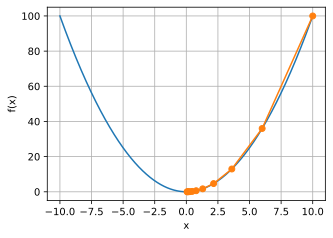

In [2]:
def f(x):  # Objective function
    return x ** 2

def f_grad(x):  # Gradient (derivative) of the objective function
    return 2 * x

def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'], figsize=(5, 3.5))


def gd(eta, f_grad, x_0, total_steps=10):
    x = x_0
    results = [x]
    for i in range(total_steps):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'total_steps {total_steps}, x: {x:f}')
    return results

results = gd(eta=0.2, f_grad=f_grad, x_0=10.0)
show_trace(results, f)


#### **Use a large learning rate**

We use the same update rule as before with $\eta = 1.2$, with the same initial value $x_0 = 10.0$.

$$x_{t+1} = x_t - \eta f'(x_t)$$

The following table shows the first 10 steps:

| Step | $x_t$      | $x_{t+1}$   |
|------|------------|-------------|
| 0    | 10.0000    | -14.0000    |
| 1    | -14.0000   | 19.6000     |
| 2    | 19.6000    | -27.4400    |
| 3    | -27.4400   | 38.4160     |
| 4    | 38.4160    | -54.7824    |
| 5    | -54.7824   | 76.6974     |
| 6    | 76.6974    | -107.3713   |
| 7    | -107.3713  | 150.3208    |
| 8    | 150.3208   | -210.4481   |
| 9    | -210.4481  | 295.6273    |

The values of $x_t$ and $x_{t+1}$ are not converging to zero. Instead, they oscillate and the value increases rapidly.

total_steps 10, x: 289.254655


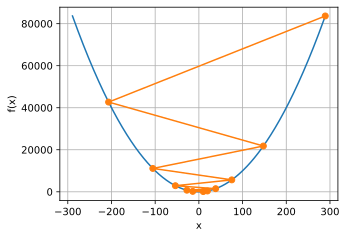

In [3]:
results = gd(eta=1.2, f_grad=f_grad, x_0=10.0)
show_trace(results, f)

### **Example 2: $f(x) = x^2 + 10sin(x)$.**

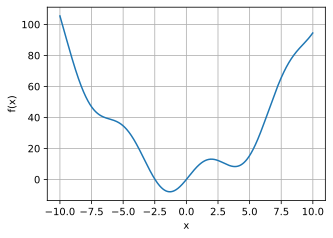

In [4]:
from math import cos, sin

def f(x):  # Objective function
    return x ** 2 + 10 * sin(x)

def f_grad(x):  # Gradient (derivative) of the objective function
    return 2 * x + 10 * cos(x)

def show_graph(start, end, f):
    x_vals = np.arange(start, end, 0.01)
    y_vals = [f(x) for x in x_vals]
    d2l.plot(x_vals, y_vals, xlabel='x', ylabel='f(x)', figsize=(5, 3.5))

show_graph(-10, 10, f)

The graph of $f(x) = x^2 + 10\sin(x)$ has both local and global minima. 
Depending on the starting point, gradient descent (GD) may converge to a local minimum or the global minimum. 
This demonstrates that the choice of initial value can affect which minimum the algorithm finds.


#### Starting from the right: $x_0=10$

total_steps 10, x: 3.837469


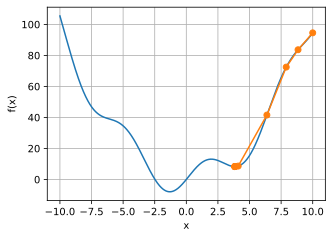

In [5]:
results = gd(eta=0.1, f_grad=f_grad, x_0=10.0)
show_trace(results, f)

#### Starting from the left: $x_0=-10$

total_steps 10, x: -1.171704


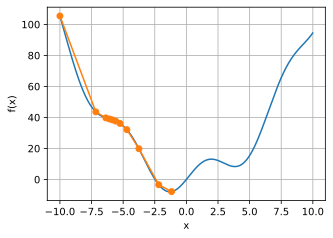

In [6]:
results = gd(eta=0.1, f_grad=f_grad, x_0=-10.0)
show_trace(results, f)

#### Note: The range [-7.5; -5]
In the range from $x = -7.5$ to $x = -5$, gradient descent requires many steps to traverse this interval. This is because the slope of the function is relatively flat in this range, causing the updates to be small and the algorithm to progress slowly through this section.


#### Best practice for learning rate
**Rule of Thumb Methods**
- **Problem**: Finding a reasonable starting point for learning rate
- **Solution**: Start with α = 0.01 or α = 0.001 for most problems
- **Impact**: Provides a safe starting point for experimentation
- **Example**: ResNet training typically starts with α = 0.1, reduced by factor of 10 at milestones

**Grid Search and Random Search**
- **Problem**: Systematically exploring learning rate space
- **Solution**: Test multiple values (e.g., 0.1, 0.01, 0.001, 0.0001) and select best performer
- **Impact**: Systematic approach to hyperparameter optimization
- **Example**: AutoML systems using grid search to find optimal learning rates automatically

**Learning Rate Scheduling**
- **Problem**: Adapting learning rate during training for optimal performance
- **Solution**: Dynamic adjustment strategies based on training progress
- **Impact**: Improved convergence and final model quality
- **Example**: Step decay reducing learning rate by factor of 10 every 30 epochs


### **Example 3: Linear regression with 3 data points.**

Learned coefficient: [1.03491814 0.515874  ]
Predicted values: [1.29285514 2.22142835 2.68571495]


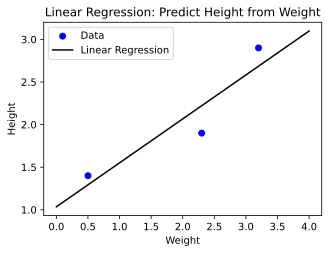

In [7]:

# 3 data points: (weight, height)
weights = np.array([[0.5], [2.3], [3.2]])
heights = np.array([1.4, 1.9, 2.9])

# e.g. y = ax + b
# (0.5, 1.4) -> 1.4 = a * 0.5 + b
# X_bias = [1, 0.5]
# w = [a, b]
# y = X_bias @ w = [1, 0.5] @ [a, b] = a * 0.5 + b
X_bias = np.hstack([np.ones_like(weights), weights])

def predict(X, w):
    return X @ w

def loss(X, y, w):
    return np.mean((y - predict(X, w)) ** 2)

def grad(X, y, w):
    return -2 * X.T @ (y - predict(X, w))

# Initialize coefficient
coefficient = [0, 0]

# Gradient descent
eta = 0.01
n_iter = 1000
losses = []

for i in range(n_iter):
    l = loss(X_bias, heights, coefficient)
    losses.append(l)
    coefficient = coefficient - eta * grad(X_bias, heights, coefficient)

print("Learned coefficient:", coefficient)
print("Predicted values:", predict(X_bias, coefficient))


# Plot data and regression line
plt.scatter(weights.flatten(), heights, color='blue', label='Data')
weight_plot = np.linspace(0, 4, 100)
X_plot = np.vstack([np.ones_like(weight_plot), weight_plot]).T
height_pred_plot = predict(X_plot, coefficient)
plt.plot(weight_plot, height_pred_plot, label='Linear Regression', color='black')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.title('Linear Regression: Predict Height from Weight')
plt.show()


### What are disadvantages of gradient descent?

* **Local minima:** 
    Gradient descent can get stuck in local minima instead of finding the global minimum, especially in non-convex functions.
* **Slow convergence:**
    The algorithm can be very slow to converge when the gradient is very flat. The number of iterations largely depends on the scale of the problem.
* **Learning rate:** 
    The choice of learning rate is crucial for the convergence of gradient descent. If the learning rate is too large, the algorithm may overshoot the minimum. If it's too small, the algorithm may take too long to converge or get stuck in a local minimum.
* **Computationally intensive** 
    Gradient descent requires the evaluation of the gradient, which can be computationally intensive, especially for large datasets.
* **Memory requirements** 
    In the case of batch gradient descent, it requires the entire training dataset to be in memory and available to the algorithm.
* **Noisy gradients** 
    In the case of stochastic gradient descent, the frequent updates can result in noisy gradients, which can lead to losses in computational efficiency.
* **Saddle points:** 
    A saddle point is a point on the surface of the loss function where the gradient is zero, but the point is not a local minimum or maximum. Gradient descent can get stuck or slow down near saddle points because the gradient is close to zero.

### Example of saddle points

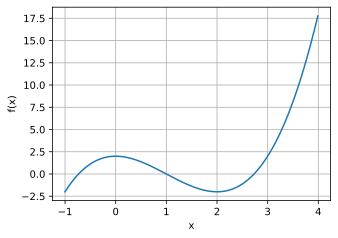

In [8]:
def f(x):  # Objective function
    return x ** 3 - 3 * x ** 2 + 2

def f_grad(x):  # Gradient (derivative) of the objective function
    return 3*x*(x - 2)

show_graph(-1, 4, f)

total_steps 10, x: 0.000000


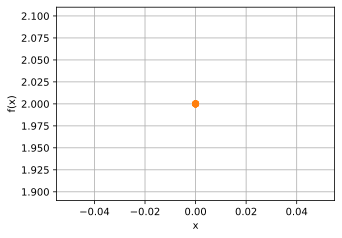

In [9]:
results = gd(eta=0.5, f_grad=f_grad, x_0=0)
show_trace(results, f)


### **1.3. Gradient direction and proof**

The gradient points to the **steepest increase direction** (the quickest uphill path you can go to reach the peak of mountain)

Consider a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ that is differentiable at point $\mathbf{x}$ and an unit vector $v \in \mathbb{R}^n$. The directional derivative of $f$ in the direction $v$ is:

$$D_v f(\mathbf{x}) = \nabla f(\mathbf{x}) \cdot v = \|\nabla f(\mathbf{x})\| \|v\| \cos(\alpha)$$
where $\alpha$ is the angle between $\nabla f(\mathbf{x})$ and $v$.

Since $\|v\| = 1$ (unit vector), we have:
$$D_v f(\mathbf{x}) = \|\nabla f(\mathbf{x})\| \cos(\alpha)$$

$\|\nabla f(\mathbf{x})\|$ is magnitude of rate of change at $x$ and unchanged by all directions.

The directional derivative is maximized when $\cos(\alpha) = 1$, which occurs when $\alpha = 0$. This means $\nabla f(\mathbf{x})$ points in the same direction as $v$.

**Therefore, $\nabla f(\mathbf{x})$ points in the direction of steepest ascent.**



### **1.4. Convergence Analysis:**

For a convex function $f$ with Lipschitz continuous gradient (i.e., $\|\nabla f(\mathbf{x}) - \nabla f(\mathbf{y})\| \leq L\|\mathbf{x}-\mathbf{y}\|$ for some constant $L$), we can prove convergence:

**Theorem:** If $f$ is convex and has Lipschitz continuous gradient with constant $L$, then for learning rate $\eta \leq \frac{2}{L}$, gradient descent converges to the global minimum.

**Proof Sketch:**
Using the convexity of $f$:
$$f(\mathbf{y}) \geq f(\mathbf{x}) + \nabla f(\mathbf{x})^T(\mathbf{y}-\mathbf{x})$$

And the Lipschitz condition:
$$f(\mathbf{y}) \leq f(\mathbf{x}) + \nabla f(\mathbf{x})^T(\mathbf{y}-\mathbf{x}) + \frac{L}{2}\|\mathbf{y}-\mathbf{x}\|^2$$

For gradient descent update: $\mathbf{y} = \mathbf{x} - \eta \nabla f(\mathbf{x})$

Substituting and simplifying:
$$f(\mathbf{x}_{t+1}) \leq f(\mathbf{x}_t) - \eta \|\nabla f(\mathbf{x}_t)\|^2 + \frac{L\eta^2}{2}\|\nabla f(\mathbf{x}_t)\|^2$$

$$f(\mathbf{x}_{t+1}) \leq f(\mathbf{x}_t) - \eta(1 - \frac{L\eta}{2})\|\nabla f(\mathbf{x}_t)\|^2$$

For $\eta \leq \frac{2}{L}$, the coefficient is positive, ensuring descent.


# **2. STOCHASTIC GRADIENT DESCENT (SGD)**

## **2.1. The challenge of vallina gradient descent (Batch Gradient Descent)**

### Objective function

The objective function is the function we aim to minimize and typically it is the average loss across all $n$ training examples in our dataset:

$$
f(\mathbf{x}) = \frac{1}{n} \sum_{i=1}^n f_i(\mathbf{x})
$$

* $f_i(\mathbf{x})$: Represents the loss incurred for a *single* training example, indexed by $i$.
* $f(\mathbf{x})$: The overall average loss we want to reduce.

### Full gradient

To minimize this objective function using standard Gradient Descent, we need to calculate its gradient. This gradient tells us the direction of the steepest ascent, so we move in the opposite direction to go downhill. The gradient of the overall objective function is the average of the gradients for each individual example:

$$
\nabla f(\mathbf{x}) = \frac{1}{n} \sum_{i=1}^n \nabla f_i(\mathbf{x})
$$

* $\nabla f_i(\mathbf{x})$: The gradient of the loss for a *single* training example.

### Computational challenge

For *every single update step* in **Gradient Descent**, you must compute $\nabla f(\mathbf{x})$ by summing up the gradients from *all $n$ examples* in your dataset.

> "the computational cost for each independent variable iteration is $\mathcal{O}(n)$, which grows linearly with $n$."

This means if you have millions or billions of training examples, a single update step would take an incredibly long time and consume vast amounts of memory.



## **2.2. Stochastic Gradient Descent**

SGD tackles this computational bottleneck. Instead of using all $n$ examples at each iteration of SGD, it uniformly samples a single random training example from the dataset. Then, we compute the gradient *only* for that one example and use it to update our parameters.

The update rule for SGD is:

$$
\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f_i(\mathbf{x})
$$

* $\nabla f_i(\mathbf{x})$: The **stochastic gradient**, computed from just the single, randomly selected example $i$.

This change has a impact on efficiency:
> "the computational cost for each iteration drops from $\mathcal{O}(n)$... to the constant $\mathcal{O}(1)$."



## **2.3. Mathematical rationale**

Assume that we uniformly sample an index i, so the probability of choosing i is $\frac{1}{n}$

If we choose index $i$ and compute $\nabla f_i(\mathbf{x})$, after the infinite steps, the average gradient will be equal the full gradient

$$
E_i [\nabla f_i(\mathbf{x})] = \sum_{i=1}^n P(\text{choose i}) . \nabla f_i(\mathbf{x}) = \frac{1}{n} \sum_{i=1}^n \nabla f_i(\mathbf{x}) = \nabla f(\mathbf{x})
$$

* $E_i [\nabla f_i(\mathbf{x})]$: Represents the **expected value** over the random choice of index $i$.

While any single step taken by SGD might not be precisely in the direction of the *true* steepest descent, **on average**, the direction indicated by the stochastic gradient $\nabla f_i(\mathbf{x})$ is exactly the same as the direction of the full gradient $\nabla f(\mathbf{x})$.

So, even with noisy steps, the algorithm consistently (on average) works

## **Example 1**: $f(\mathbf{x}) = x_1^2 + 2.x_2^2$

In [10]:
def f(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):  # Gradient of the objective function: respected to x1, respected to x2
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # Simulate noisy gradient
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def gd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr  # Constant learning rate


Batch gradient descent
epoch 50, x1: -0.000071, x2: -0.000000


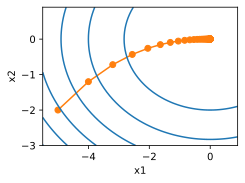

In [11]:

print("Batch gradient descent")
d2l.show_trace_2d(f, d2l.train_2d(gd, steps=50, f_grad=f_grad))

Stochastic gradient descent
epoch 50, x1: 0.209479, x2: 0.069248


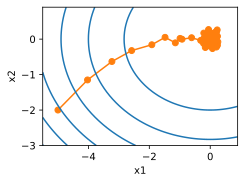

In [12]:

print("Stochastic gradient descent")
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

Despite its noisy trajectory, SGD is able to approach the vicinity of the local minimum.

## **2.4. Dynamic learning rate**



### Problems with a constant learning rate
- If $\eta$ is **too large**: The optimization algorithm might **overshoot** the minimum, oscillate wildly, or even **diverge** (move further and further away from the minimum) without converging.
- If $\eta$ is **too small**: The algorithm will converge **extremely slowly**, wasting significant computational time and resources.



### Benefits of a dynamic learning rate:
- Gradually decreasing $\eta$ over time (e.g., after each epoch or a certain number of iterations):
- Start with a **larger $\eta$** to quickly approach the vicinity of the minimum.
- Then, **reduce $\eta$** to take smaller, more precise steps, helping the algorithm stabilize and converge deeper into the minimum without excessive oscillations.



### Learning rate decay strategies

$$
\eta(t) = \begin{cases} \\ \eta_0 \text{ if } t_i \leq t < t_{i+1} & \text{piecewise constant} \\ \eta_0 \cdot e^{-kt} & \text{exponential decay} \\ \eta_0 \cdot (1 + \beta t)^{-\alpha} & \text{polynomial decay} \end{cases}
$$
where $t$ typically represents the number of epochs or iterations:

* **Piecewise Constant:**
    * **Meaning:** The learning rate remains fixed for a certain number of epochs, then sharply drops to a smaller value, stays constant again, and so on.
    * **Example:** Learning rate is 0.01 for the first 10 epochs, then drops to 0.001 for the next 10 epochs, etc.
    * **Characteristics:** Simple to implement and widely used. It's often employed when optimization progress stalls or plateaus.

* **b. Exponential Decay:**
    * **Meaning:** The learning rate decreases exponentially with time $t$. The common formula is $\eta(t) = \eta_0 \cdot e^{-kt}$, where $\eta_0$ is the initial learning rate and $k$ is a positive constant controlling the decay rate.
    * **Characteristics:** The learning rate decreases quite rapidly and continuously. It tends to drop more aggressively over time compared to polynomial decay in some scenarios.

* **c. Polynomial Decay:**
    * **Meaning:** The learning rate decreases according to a polynomial function of time $t$. The common formula is $\eta(t) = \eta_0 \cdot (1 + \beta t)^{-\alpha}$, where $\eta_0$ is the initial learning rate, and $\beta$ and $\alpha$ are positive constants.
    * **Characteristics:** The decay rate can be adjusted more flexibly depending on the value of $\alpha$. In practice, it is suggested that "a popular choice is polynomial decay with $\alpha = 0.5$." This type of decay has theoretical proofs showing it behaves well, especially in the context of convex optimization. It's generally less aggressive than exponential decay but still very effective.

### Example 2: $f(\mathbf{x}) = x_1^2 + 2.x_2^2$ with different learning rate decay strategies

epoch 100, x1: -0.883633, x2: -0.072050


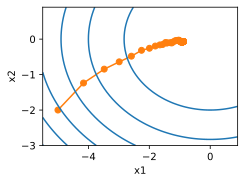

In [13]:
# Agressively decreased learning rate with exponential decay

def exponential_lr():
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=100, f_grad=f_grad))

epoch 50, x1: 0.011485, x2: -0.053613


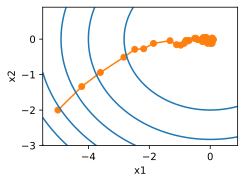

In [14]:
# Polynomial decay to start with a small rate, then rapidly ramp up and then decrease it again, albeit more slowly

def polynomial_lr():
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

## **2.5. Convergence analysis for convex objectives**

The goal is to prove that SGD converges to the optimal solution and to understand its rate of convergence.

**Assumptions:**
1.  **Convexity:** The objective function $f(\boldsymbol{\xi}, \mathbf{x})$ is convex with respect to $\mathbf{x}$ (the parameter vector) for every data point $\boldsymbol{\xi}$. This implies that the expected risk function $R(\mathbf{x}) = E_{\boldsymbol{\xi}}[f(\boldsymbol{\xi}, \mathbf{x})]$ is also convex.
2.  **Bounded Gradient:** The L2 norm of the stochastic gradient $\partial_\mathbf{x} f(\boldsymbol{\xi}, \mathbf{x})$ is bounded by some constant $L$. That is, $\|\partial_\mathbf{x} f(\boldsymbol{\xi}, \mathbf{x})\| \leq L$.


### **Notation**

* $\mathbf{x}_t$: The model's parameter vector at time step $t$.
* $\boldsymbol{\xi}_t$: A data point (or mini-batch) chosen randomly from the data distribution at step $t$.
* $\eta_t$: The learning rate at step $t$. (learning rate is dynamic)
* $\partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)$: The stochastic gradient (the gradient with respect to $\mathbf{x}$ based only on sample $\boldsymbol{\xi}_t$).
* **SGD update rule:**
    $$\mathbf{x}_{t+1} = \mathbf{x}_{t} - \eta_t \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)$$
* $R(\mathbf{x}) = E_{\boldsymbol{\xi}}[f(\boldsymbol{\xi}, \mathbf{x})]$: The expected risk – the average loss over the entire (theoretical) data distribution.
* $R^*$: The minimum value of the expected risk $R(\mathbf{x})$.
* $\mathbf{x}^*$: The parameter vector that achieves $R^*$ (the minimum point).



### **Step 1: Distance to the minimum point**

The goal is to see how the distance from the current parameters $\mathbf{x}_t$ to the optimal parameters $\mathbf{x}^*$ changes over time. We track the squared L2 norm of this distance: $\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2$.

We start by substituting the $\mathbf{x}_{t+1}$ from the SGD update rule:
$$
\begin{aligned}
&\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2 \\
=& \|\mathbf{x}_{t} - \eta_t \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t) - \mathbf{x}^*\|^2 \\
\end{aligned}
$$
Now, we use the property of the squared L2 norm: $\|A - B\|^2 = \|A\|^2 + \|B\|^2 - 2\langle A, B \rangle$.
Here, we let $A = (\mathbf{x}_t - \mathbf{x}^*)$ and $B = \eta_t \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)$.

$$
\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2 = \|\mathbf{x}_{t} - \mathbf{x}^*\|^2 + \eta_t^2 \|\partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)\|^2 - 2 \eta_t \left\langle \mathbf{x}_t - \mathbf{x}^*, \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)\right\rangle. \quad \text{(1)}
$$

* $\|\mathbf{x}_{t} - \mathbf{x}^*\|^2$: The current squared distance to the optimum.
* $\eta_t^2 \|\partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)\|^2$: A positive term and tends to increase the distance.
* $- 2 \eta_t \left\langle \mathbf{x}_t - \mathbf{x}^*, \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)\right\rangle$: The dot product term. The dot product is positive (as $\mathbf{x}_t - \mathbf{x}^*$ and the gradient are aligned), then this whole term is negative, causing the distance to decrease. It is indicating we're moving towards $\mathbf{x}^*$
    * Gradient points to the steepest ascent 
    * $\mathbf{x}_t - \mathbf{x}^*$ pointing from the minimum $\mathbf{x}^*$ to $\mathbf{x}_t$ (the result of subtracting vectors).
    * Both are pointing uphill.





### **Step 2: Bounded Stochastic Gradient assumption**

Assume that the magnitude (L2 norm) of the stochastic gradient is bounded by a constant $L$:
$$\|\partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)\| \leq L$$
From this assumption, we can bound the squared norm term in Step 1:
$$\eta_t^2 \|\partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)\|^2 \leq \eta_t^2 L^2. \quad \text{(2)}$$
This assumption helps ensure that our step sizes don't become infinitely large, which would destabilize the optimization process.





### **Step 3: Leveraging convexity**

For any convex function $f(\mathbf{x})$, it satisfies the following inequality (the subgradient inequality, which holds for gradients of differentiable convex functions):
$$f(\mathbf{y}) \geq f(\mathbf{x}) + \langle \nabla f(\mathbf{x}), \mathbf{y} - \mathbf{x} \rangle$$
Applying this to our specific function $f(\boldsymbol{\xi}_t, \mathbf{x})$ with $\mathbf{y} = \mathbf{x}^*$ and $\mathbf{x} = \mathbf{x}_t$:
$$f(\boldsymbol{\xi}_t, \mathbf{x}^*) \geq f(\boldsymbol{\xi}_t, \mathbf{x}_t) + \left\langle \partial_{\mathbf{x}} f(\boldsymbol{\xi}_t, \mathbf{x}_t), \mathbf{x}^* - \mathbf{x}_t \right\rangle.$$
$$f(\boldsymbol{\xi}_t, \mathbf{x}^*) - f(\boldsymbol{\xi}_t, \mathbf{x}_t) \geq \left\langle \partial_{\mathbf{x}} f(\boldsymbol{\xi}_t, \mathbf{x}_t), \mathbf{x}^* - \mathbf{x}_t \right\rangle$$
Multiply by -1 and reverse the inequality sign:
$$f(\boldsymbol{\xi}_t, \mathbf{x}_t) - f(\boldsymbol{\xi}_t, \mathbf{x}^*) \leq -\left\langle \partial_{\mathbf{x}} f(\boldsymbol{\xi}_t, \mathbf{x}_t), \mathbf{x}^* - \mathbf{x}_t \right\rangle$$
And since $\langle A, -B \rangle = -\langle A, B \rangle$, we can write $\mathbf{x}^* - \mathbf{x}_t = -(\mathbf{x}_t - \mathbf{x}^*)$:
$$ \left\langle \mathbf{x}_t - \mathbf{x}^*, \partial_{\mathbf{x}} f(\boldsymbol{\xi}_t, \mathbf{x}_t) \right\rangle \geq f(\boldsymbol{\xi}_t, \mathbf{x}_t) - f(\boldsymbol{\xi}_t, \mathbf{x}^*). \quad \text{(3)}$$

This inequality shows that the dot product term (which contributes to reducing the distance) is lower-bounded by the difference between the current loss and the optimal loss. This means if we are far from optimal, the gradient points in a direction that should give us good progress.





### **Step 4: Combining inequalities to bound distance change**

Now, we substitute the bounds from Equation (2) and (3) back into Equation (1) from Step 1.
Recall Equation (1):
$\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2 = \|\mathbf{x}_{t} - \mathbf{x}^*\|^2 + \eta_t^2 \|\partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)\|^2 - 2 \eta_t \left\langle \mathbf{x}_t - \mathbf{x}^*, \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)\right\rangle$

Substitute (2) into the second term:
$\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2 \leq \|\mathbf{x}_{t} - \mathbf{x}^*\|^2 + \eta_t^2 L^2 - 2 \eta_t \left\langle \mathbf{x}_t - \mathbf{x}^*, \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)\right\rangle$

Now, substitute (3) into the third term. Since (3) provides a *lower bound* for the dot product term, and this term is being *subtracted* (multiplied by $-2\eta_t$), we must flip the inequality when substituting:
$-2 \eta_t \left\langle \mathbf{x}_t - \mathbf{x}^*, \partial_\mathbf{x} f(\boldsymbol{\xi}_t, \mathbf{x}_t)\right\rangle \leq -2 \eta_t (f(\boldsymbol{\xi}_t, \mathbf{x}_t) - f(\boldsymbol{\xi}_t, \mathbf{x}^*))$

Plugging this into the combined inequality:
$$\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2 \leq \|\mathbf{x}_{t} - \mathbf{x}^*\|^2 + \eta_t^2 L^2 - 2 \eta_t (f(\boldsymbol{\xi}_t, \mathbf{x}_t) - f(\boldsymbol{\xi}_t, \mathbf{x}^*))$$
Rearranging the terms to isolate the change in squared distance:
$$\|\mathbf{x}_{t} - \mathbf{x}^*\|^2 - \|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2 \geq 2 \eta_t (f(\boldsymbol{\xi}_t, \mathbf{x}_t) - f(\boldsymbol{\xi}_t, \mathbf{x}^*)) - \eta_t^2 L^2. \quad \text{(4)}$$

**Significance:** This inequality shows that the decrease in squared distance to the optimum depends on the progress made (the difference between current loss and optimal loss) balanced against a penalty term related to the squared learning rate and the gradient bound. This implicitly suggests that for sustained progress, the learning rate $\eta_t$ must **vanish** (decrease to zero) as $f(\boldsymbol{\xi}_t, \mathbf{x}_t) - f(\boldsymbol{\xi}_t, \mathbf{x}^*)$ approaches zero.





### **Step 5: Taking expectations**

Since the update $\mathbf{x}_{t+1}$ and the sampled data $\boldsymbol{\xi}_t$ are random, we are interested in the **expected behavior** of the algorithm. We take the expectation of both sides of Equation (4) over all randomness up to step $t$:

$$E\left[\|\mathbf{x}_{t} - \mathbf{x}^*\|^2 - \|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2\right] \geq E\left[2 \eta_t (f(\boldsymbol{\xi}_t, \mathbf{x}_t) - f(\boldsymbol{\xi}_t, \mathbf{x}^*)) - \eta_t^2 L^2\right]$$

Using the linearity of expectation ($E[A+B] = E[A]+E[B]$ and $E[cA]=cE[A]$):
$$E\left[\|\mathbf{x}_{t} - \mathbf{x}^*\|^2\right] - E\left[\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2\right] \geq 2 \eta_t E\left[f(\boldsymbol{\xi}_t, \mathbf{x}_t) - f(\boldsymbol{\xi}_t, \mathbf{x}^*)\right] - \eta_t^2 L^2.$$

Now, focus on the term $E\left[f(\boldsymbol{\xi}_t, \mathbf{x}_t) - f(\boldsymbol{\xi}_t, \mathbf{x}^*)\right]$.
By linearity of expectation, this is $E\left[f(\boldsymbol{\xi}_t, \mathbf{x}_t)\right] - E\left[f(\boldsymbol{\xi}_t, \mathbf{x}^*)\right]$.

Using the **[Law of Total Expectation](https://en.wikipedia.org/wiki/Law_of_total_expectation)**  ($E[X] = E[E[X|Y]]$) and the definition of Expected Risk $R(\mathbf{x}) = E_{\boldsymbol{\xi}}[f(\boldsymbol{\xi}, \mathbf{x})]$:
* $E[f(\boldsymbol{\xi}_t, \mathbf{x}_t)] = E_{\mathbf{x}_t} [E_{\boldsymbol{\xi}_t}[f(\boldsymbol{\xi}_t, \mathbf{x}_t) | \mathbf{x}_t]] = E_{\mathbf{x}_t}[R(\mathbf{x}_t)] = E[R(\mathbf{x}_t)]$ (since $\mathbf{x}_t$ is random, $R(\mathbf{x}_t)$ is also random).
* $E[f(\boldsymbol{\xi}_t, \mathbf{x}^*)] = R^*$ (by definition).

Substituting these back, we get the fundamental inequality for the expected decrease in squared distance:
$$E\left[\|\mathbf{x}_{t} - \mathbf{x}^*\|^2\right] - E\left[\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2\right] \geq 2 \eta_t [E[R(\mathbf{x}_t)] - R^*] - \eta_t^2 L^2. \quad \text{(5)}$$





### **Step 6: Summing over time**

Now, we sum Equation (5) from $t=1$ to $t=T$ to see the cumulative progress over $T$ steps.

Consider the left-hand side (LHS) sum:
$$ \sum_{t=1}^T \left( E\left[\|\mathbf{x}_{t} - \mathbf{x}^*\|^2\right] - E\left[\|\mathbf{x}_{t+1} - \mathbf{x}^*\|^2\right] \right) $$
Most terms cancel out:
$$ \left( E[\|\mathbf{x}_1 - \mathbf{x}^*\|^2] - E[\|\mathbf{x}_2 - \mathbf{x}^*\|^2] \right) + \left( E[\|\mathbf{x}_2 - \mathbf{x}^*\|^2] - E[\|\mathbf{x}_3 - \mathbf{x}^*\|^2] \right) + \dots + \left( E[\|\mathbf{x}_T - \mathbf{x}^*\|^2] - E[\|\mathbf{x}_{T+1} - \mathbf{x}^*\|^2] \right) $$
The sum simplifies to:
$$ E[\|\mathbf{x}_1 - \mathbf{x}^*\|^2] - E[\|\mathbf{x}_{T+1} - \mathbf{x}^*\|^2] $$

Next, we **drop the lower term** $E[\|\mathbf{x}_{T+1} - \mathbf{x}^*\|^2]$ from the LHS. Since a squared norm is always non-negative, $E[\|\mathbf{x}_{T+1} - \mathbf{x}^*\|^2] \geq 0$.

Furthermore, $\mathbf{x}_1$ is typically the initial parameter value. As the starting point, $\mathbf{x}_1$ is considered deterministic. Thus, its expectation is simply itself: $E[\|\mathbf{x}_1 - \mathbf{x}^*\|^2] = \|\mathbf{x}_1 - \mathbf{x}^*\|^2$.

Now, sum the right-hand side (RHS) of Equation (5):
$$ \sum_{t=1}^T \left( 2 \eta_t [E[R(\mathbf{x}_t)] - R^*] - \eta_t^2 L^2 \right) $$
Using linearity of summation:
$$ = 2 \sum_{t=1}^T \eta_t [E[R(\mathbf{x}_t)] - R^*] - L^2 \sum_{t=1}^T \eta_t^2 $$

Combining LHS and RHS, we get:
$$\|\mathbf{x}_1 - \mathbf{x}^*\|^2 \geq 2 \left (\sum_{t=1}^T \eta_t \right) [E[R(\mathbf{x}_t)] - R^*] - L^2 \sum_{t=1}^T \eta_t^2. \quad \text{(6)}$$





### **Step 7: Apply Jensen's inequality**

First, we define the **average parameter** $\bar{\mathbf{x}}$:
$$\bar{\mathbf{x}} \stackrel{\textrm{def}}{=} \frac{\sum_{t=1}^T \eta_t \mathbf{x}_t}{\sum_{t=1}^T \eta_t}.$$

$\bar{\mathbf{x}}$ is a weighted average of all the parameter vectors.
Because $\mathbf{x}_t$ are random variables, $\bar{\mathbf{x}}$ is also a random variable.

Let $\alpha_t = \eta_t / (\sum_{k=1}^T \eta_k)$, which means $\eta_t = \alpha_t \sum_{k=1}^T \eta_k$. Subtitude to the definition of $\bar{\mathbf{x}}$ above, we have $\bar{\mathbf{x}} = \sum_{t=1}^T \alpha_t \mathbf{x}_t$.

Next, we apply **Jensen's Inequality**. For a convex function $g$, Jensen's Inequality states that $\sum_i \alpha_i g(x_i)  \geq g\left(\sum_i \alpha_i x_i\right)$. 

More generally, for a convex function $g$ and a set of points as random variables $\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_T$ with positive weights $\alpha_t$ summing to 1, we have:

$$\sum_{t=1}^T \alpha_t g(\mathbf{x}_t)  \geq g\left(\sum_{t=1}^T \alpha_t \mathbf{x}_t\right)$$
$$g(\bar{\mathbf{x}}) \leq \sum_{t=1}^T \alpha_t g(\mathbf{x}_t)$$

Since $R(\mathbf{x})$ is a convex function, and $\mathbf{x}_t$ are random variables. By applying Jensen's Inequality:
$$R(\bar{\mathbf{x}}) \leq \sum_{t=1}^T \alpha_t R(\mathbf{x}_t)$$

Taking expectation:
$$E\left[R(\bar{\mathbf{x}})\right] \leq E\left[\sum_{t=1}^T \alpha_t R(\mathbf{x}_t)\right]$$

By linearity of expectation:
$$E\left[R(\bar{\mathbf{x}})\right] \leq \sum_{t=1}^T \alpha_t E[R(\mathbf{x}_t)]$$

Substituting $\alpha_t$:
$$E\left[R(\bar{\mathbf{x}})\right] \leq \frac{\sum_{t=1}^T \eta_t E[R(\mathbf{x}_t)]}{\sum_{t=1}^T \eta_t}$$

Rearranging this inequality:
$$\sum_{t=1}^T \eta_t E[R(\mathbf{x}_t)] \geq \left(\sum_{t=1}^T \eta_t\right) E[R(\bar{\mathbf{x}})]. \quad \text{(7)}$$






### **Step 8: Final convergence bound**

Inequality (6):
$\|\mathbf{x}_1 - \mathbf{x}^*\|^2 \geq 2 \left (\sum_{t=1}^T \eta_t \right) [E[R(\mathbf{x}_t)] - R^*] - L^2 \sum_{t=1}^T \eta_t^2$

Now, we substitute the inequality (7) into the inequality (6):

$$\|\mathbf{x}_1 - \mathbf{x}^*\|^2 \geq 2 \left (\sum_{t=1}^T \eta_t \right) E[R(\bar{\mathbf{x}})] - 2 \left (\sum_{t=1}^T \eta_t \right) R^* - L^2 \sum_{t=1}^T \eta_t^2$$

$$2 \left (\sum_{t=1}^T \eta_t \right) E[R(\bar{\mathbf{x}})] - 2 \left (\sum_{t=1}^T \eta_t \right) R^* \leq \|\mathbf{x}_1 - \mathbf{x}^*\|^2 + L^2 \sum_{t=1}^T \eta_t^2$$
$$2 \left (\sum_{t=1}^T \eta_t \right) (E[R(\bar{\mathbf{x}})] - R^*) \leq \|\mathbf{x}_1 - \mathbf{x}^*\|^2 + L^2 \sum_{t=1}^T \eta_t^2$$
$$E[R(\bar{\mathbf{x}})] - R^* \leq \frac{\|\mathbf{x}_1 - \mathbf{x}^*\|^2 + L^2 \sum_{t=1}^T \eta_t^2}{2 \sum_{t=1}^T \eta_t}.$$

Let's define $r^2 = \|\mathbf{x}_1 - \mathbf{x}^*\|^2$.

$$
E[R(\bar{\mathbf{x}})] - R^* \leq \frac{r^2 + L^2 \sum_{t=1}^T \eta_t^2}{2 \sum_{t=1}^T \eta_t}. \quad \text{(8)}
$$

**Meaning**
* This inequality provides an **upper bound** on how far the expected risk of the *averaged parameter* $\bar{\mathbf{x}}$ is from the optimal risk $R^*$.
* The speed of convergence depends on:
    * $r$: How far the initial parameters $\mathbf{x}_1$ are from the optimal $\mathbf{x}^*$.
    * $L$: The bound on the magnitude of the stochastic gradients.
    * The choice of learning rates $\eta_t$ over $T$ steps.



### **Optimal learning rate and convergence rate**

If we choose a constant learning rate as constant: $\eta_t = \eta = r/(L \sqrt{T})$:
* $\sum_{t=1}^T \eta_t = T \cdot \frac{r}{L\sqrt{T}} = \frac{rT}{\sqrt{T}L} = \frac{r\sqrt{T}}{L}$
* $\sum_{t=1}^T \eta_t^2 = T \cdot \left(\frac{r}{L\sqrt{T}}\right)^2 = T \cdot \frac{r^2}{L^2 T} = \frac{r^2}{L^2}$


$$
E[R(\bar{\mathbf{x}})] - R^* \leq \frac{r^2 + L^2 \left(\frac{r^2}{L^2}\right)}{2 \left(\frac{r\sqrt{T}}{L}\right)} = \frac{r^2 + r^2}{\frac{2r\sqrt{T}}{L}} = \frac{2r^2}{\frac{2r\sqrt{T}}{L}} = \frac{rL}{\sqrt{T}}
$$
This shows that for convex objective functions, SGD converges with a rate of **$\mathcal{O}(1/\sqrt{T})$** to the optimal solution. This means to reduce the gap to optimal point by a factor of 2, you typically need 4 times as many steps.


## **2.6. Stochastic gradient with finite samples**

In the theoretical ideal, Stochastic Gradient Descent operates by sampling data points from a continuous, often infinite, underlying data distribution. However, in practical machine learning, the dataset is invariably finite. This introduces specific challenges related to how we sample data for gradient estimation, directly impacting training efficiency and stability.

### Sampling "with replacement" in finite samples

This strategy involves randomly picking a data point from the dataset, using it to compute a gradient, and then **putting it back** into the dataset for subsequent picks. This means each sample is chosen independently at each step and there is chance to pick the sample again

This approach introduces two major problems:

### Inefficient data usage / unseen data

When sampling with replacement, there's no guarantee that all data points will be used within a single "pass" equivalent to the dataset size (`n` picks for `n` data points). Some data points may be repeatedly used, while others are entirely left out. This leads to inefficient utilization of the available training data within an epoch.

### Increased variance of gradient estimates

Because some samples are repeated and others are omitted in a given set of `n` picks (representing a pseudo-epoch), the gradient computed from these samples becomes a less representative and noisier estimate of the batch gradient. This increased "noise" translates directly to higher variance in the gradient estimates (Make less smooth gradient convergence graph)

### Probability calculations

Let's quantify the data inefficiency when picking exactly $n$ samples *with replacement* from a dataset of $n$ unique data points (mimicking one epoch's worth of updates).

* **Probability that a particular sample $i$ is NOT chosen in $n$ picks:**
    In a single pick, the probability of *not* choosing sample $i$ is $(1 - 1/n)$. If we make $n$ independent picks, the probability it's never chosen is:
    $$
    P(\text{omit-}i) = \left(1 - \frac{1}{n} \right)^n
    $$
    As $n$ gets very large, this value approaches $e^{-1} \approx 0.3678$.

* **Probability that it is chosen at least once in $n$ picks:**
    This is the complement of the above:
    $$
    P(\text{choose-}i) = 1 - \left(1 - \frac{1}{n} \right)^n \approx 1 - e^{-1} \approx 0.6322
    $$
    This means roughly **63%** of your dataset will be seen at least once if you perform `n` picks with replacement.

* **Probability that it is chosen EXACTLY once in $n$ picks:**
    $$
    P(\text{exactly 1}) = \binom{n}{1} \left(\frac{1}{n}\right)^1 \left(1 - \frac{1}{n}\right)^{n-1} = \left(1 - \frac{1}{n}\right)^{n-1}
    $$
    As $n$ gets very large, this value also approaches $e^{-1} \approx 0.3678$.

**Meaning:**
* $\approx$ 37% of data points will not be seen at all.
* $\approx$ 63% of data points will be seen at least once.
* In 63% of that points, $\approx$ 37% of data points will be seen exactly once while $\approx$ 26% of data points are repeated taken.



### The best practice: Sampling without replacement

Due to the inefficiencies and the added noise/variance when sampling *with replacement*, the common practice for SGD in machine learning is **sampling without replacement**.

This is achieved by:
* **Shuffling the entire dataset** at the beginning of each epoch.
* Then, processing data points in **sequential mini-batches** from this shuffled order until all points have been used.

This approach ensures:
* **Efficient data usage:** Every data point contributes to the learning process exactly once per epoch.
* **Reduced variance of gradient estimates:** Each sample has an equal contribution within an epoch, leading to more stable updates.

# **3. MINIBATCH STOCHASTIC GRADIENT DESCENT**

## **3.1. The limitations of 2 extreme approaches**

* **Full batch gradient descent:**
    * **Computational cost:** Each parameter update requires computing gradients over the *entire* dataset. For datasets with millions or billions of examples, this process is astronomically slow and memory-intensive ($\mathcal{O}(N)$ per update).
    * **Data inefficiency:** If many data points are highly similar, computing their individual gradients and then averaging them across the entire dataset can involve redundant calculations, as the information gained from highly similar samples might not justify the computational expense.

* **Stochastic Gradient Descent - batch size 1:**
    * **Computational inefficiency / Hardware uUnderutilization:** While conceptually fast (one sample per update), this approach fails to leverage the full power of modern hardware. CPUs and especially GPUs are designed for **vectorization** (performing the same operation on multiple pieces of data simultaneously) and **parallel processing**. Feeding them one data point at a time leaves much of their computational capacity idle.


## **3.2. Leveraging computational efficiency**

* **Hardware parallelization (Multiple servers/Multiple cores)**
    * For systems involving multiple GPUs or multiple servers, larger mini-batch sizes enable effective distribution of workload. You can send a sub-batch of data to each processing unit, ensuring all units are busy simultaneously, thereby maximizing the computational capability of the entire system.

    * Example: Suppose you have a training dataset and access to 4 GPUs. If you use a mini-batch size of 128, you can split this mini-batch into 4 sub-batches of 32 samples each. Each GPU processes its own sub-batch in parallel, computes gradients, and then the results are aggregated to update the model parameters. This parallelization dramatically speeds up training compared to using a single GPU or processing one sample at a time. 

* **Memory hierarchy and caches**

    * Devices have a hierarchy of memory: small, ultra-fast caches (L1, L2, L3) close to the processing cores, and much larger, slower main memory (RAM). 

    * Accessing memory for the very first piece of data is called 'Burst Reads' and it is relatively expensive because it requires main memory query. However, accessing subsequent data that is stored sequentially is much cheaper (spatial locality of cache). By grouping data into mini-batches, we can load a larger chunk of data into the fast cache. The processor can then perform many operations on this "local" data within the cache without repeatedly waiting for slow main memory fetches. This keeps the processor continuously "fed" and busy.


## **Example 1: Block matrix multiplication**
Consider matrix-matrix multiplication $\mathbf{A} = \mathbf{B}\mathbf{C}$



### **Naive matrix multiplication: Element-wise ($\mathbf{A}_{ij} = \mathbf{B}_{i,:} \mathbf{C}_{:,j}$)**

* **Description:** To compute each element $\mathbf{A}_{ij}$ of the result matrix $\mathbf{A} = \mathbf{B}\mathbf{C}$, you take the dot product of the $i$-th row of matrix $\mathbf{B}$ and the $j$-th column of matrix $\mathbf{C}$.
    
* **Example (calculating one element $\mathbf{A}_{11}$ for $2 \times 2$ matrices):**
    Let $\mathbf{B} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ and $\mathbf{C} = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}$.
    To find $\mathbf{A}_{11}$:
    $$ \mathbf{A}_{11} = (\mathbf{B}_{11} \cdot \mathbf{C}_{11}) + (\mathbf{B}_{12} \cdot \mathbf{C}_{21}) = (1 \cdot 5) + (2 \cdot 7) = 5 + 14 = 19 $$

* **Pros:**
    * Simple to understand and implement directly from the definition.
    * Easy to verify manually for small matrices.

* **Cons:**
    * **Extremely inefficient memory access:** This is the biggest problem. While reading a row of $\mathbf{B}$ is often sequential (leverage locality of caches), reading a *column* of $\mathbf{C}$ typically involves "striding" across memory (accessing non-contiguous locations). This leads to frequent **cache misses**, where the processor spends most of its time waiting for data to be loaded from slow main memory (RAM) into fast CPU/GPU caches.
    * **Poor cache utilization:** Data brought into cache might not be fully utilized before it's evicted to make space for new data.


### **Column-wise / Row-wise multiplication ($\mathbf{A}_{:,j}$ or $\mathbf{A}_{i,:}$ at a time)**

* **Description:** Instead of computing individual elements (Naive method), you compute entire columns (or rows) of the result matrix at a time. For example, to compute the $j$-th column of $\mathbf{A}$ ($\mathbf{A}_{:,j}$), you multiply matrix $\mathbf{B}$ by the $j$-th column of matrix $\mathbf{C}$ ($\mathbf{C}_{:,j}$).
    $$ \mathbf{A}_{:,j} = \mathbf{B} \mathbf{C}_{:,j} $$

* **Example:**
    $$ \mathbf{B} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}, \quad \mathbf{C} = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} $$

    To compute the first column of $\mathbf{A}$ (i.e., $\mathbf{A}_{:,1}$), we multiply $\mathbf{B}$ by the first column of $\mathbf{C}$:

    $$ \mathbf{C}_{:,1} = \begin{bmatrix} 5 \\ 7 \end{bmatrix} $$

    So,

    $$
    \mathbf{A}_{:,1} = \mathbf{B} \cdot \mathbf{C}_{:,1} = 
    \begin{bmatrix}
    1 & 2 \\
    3 & 4
    \end{bmatrix}
    \begin{bmatrix}
    5 \\
    7
    \end{bmatrix}
    =
    \begin{bmatrix}
    (1 \times 5) + (2 \times 7) \\
    (3 \times 5) + (4 \times 7)
    \end{bmatrix}
    =
    \begin{bmatrix}
    5 + 14 \\
    15 + 28
    \end{bmatrix}
    =
    \begin{bmatrix}
    19 \\
    43
    \end{bmatrix}
    $$

    Similarly, to compute the second column of $\mathbf{A}$ (i.e., $\mathbf{A}_{:,2}$), we multiply $\mathbf{B}$ by the second column of $\mathbf{C}$:

    $$ \mathbf{C}_{:,2} = \begin{bmatrix} 6 \\ 8 \end{bmatrix} $$

    $$
    \mathbf{A}_{:,2} = \mathbf{B} \cdot \mathbf{C}_{:,2} = 
    \begin{bmatrix}
    1 & 2 \\
    3 & 4
    \end{bmatrix}
    \begin{bmatrix}
    6 \\
    8
    \end{bmatrix}
    =
    \begin{bmatrix}
    (1 \times 6) + (2 \times 8) \\
    (3 \times 6) + (4 \times 8)
    \end{bmatrix}
    =
    \begin{bmatrix}
    6 + 16 \\
    18 + 32
    \end{bmatrix}
    =
    \begin{bmatrix}
    22 \\
    50
    \end{bmatrix}
    $$

    Therefore, the resulting matrix $\mathbf{A}$ is:

    $$
    \mathbf{A} = \begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix}
    $$

* **Pros:**
    * **Better cache performance than naive way**: By keeping the single column vector $\mathbf{C}_{:,j}$ (which is small) in cache while traversing through the rows of $\mathbf{B}$, it reduces cache misses compared to the element-wise method.

* **Cons:**
    * Still not as efficient if B is very large matrices, as it doesn't fully leverage the locality of both input matrices simultaneously.

### **Load the entire matrices $\mathbf{B}$ and $\mathbf{C}$ in cache and perform multiplication**

* **Description:** CPU will load $\mathbf{B}$ and $\mathbf{C}$ from main memory and store entire matrices in cache, then perform the full matrix multiplication $\mathbf{A} = \mathbf{B}\mathbf{C}$ in one operation.

* **Pros:**
    * **Most efficient computation:** Takes only 2 burst reads from main memory and can leverage cache for all subsequent operations

* **Cons:**
    * **Memory constraints:** Most real-world matrices are too large to fit entirely in cache


### **Block matrix multiplication**

* **Description:** Matrices are divided into smaller sub-matrices, or "blocks." The multiplication is then performed using these blocks as if they were elements in a larger matrix.

* **Example**
    Let $\mathbf{B} = \begin{bmatrix} \mathbf{B}_{11} & \mathbf{B}_{12} \\ \mathbf{B}_{21} & \mathbf{B}_{22} \end{bmatrix}$ and $\mathbf{C} = \begin{bmatrix} \mathbf{C}_{11} & \mathbf{C}_{12} \\ \mathbf{C}_{21} & \mathbf{C}_{22} \end{bmatrix}$, where each $\mathbf{B}_{ij}, \mathbf{C}_{ij}$ is a $2 \times 2$ matrix.

    Then, the resulting block $\mathbf{A}_{11}$ in $\mathbf{A} = \mathbf{B}\mathbf{C}$ is calculated as:

    $$ \mathbf{A}_{11} = \mathbf{B}_{11}\mathbf{C}_{11} + \mathbf{B}_{12}\mathbf{C}_{21} $$

    Let's use specific numbers for $\mathbf{B}_{11}, \mathbf{C}_{11}, \mathbf{B}_{12}, \mathbf{C}_{21}$:

    $$ \mathbf{B}_{11} = \begin{bmatrix} 1 & 2 \\ 5 & 6 \end{bmatrix}, \quad \mathbf{C}_{11} = \begin{bmatrix} 10 & 11 \\ 14 & 15 \end{bmatrix} $$

    $$ \mathbf{B}_{12} = \begin{bmatrix} 3 & 4 \\ 7 & 8 \end{bmatrix}, \quad \mathbf{C}_{21} = \begin{bmatrix} 18 & 19 \\ 22 & 23 \end{bmatrix} $$
    
    1.  Compute $\mathbf{B}_{11}\mathbf{C}_{11}$:
        $$ \begin{bmatrix} 1 & 2 \\ 5 & 6 \end{bmatrix} \begin{bmatrix} 10 & 11 \\ 14 & 15 \end{bmatrix} = \begin{bmatrix} 38 & 41 \\ 134 & 145 \end{bmatrix} $$
    
    2.  Compute $\mathbf{B}_{12}\mathbf{C}_{21}$:
        $$ \begin{bmatrix} 3 & 4 \\ 7 & 8 \end{bmatrix} \begin{bmatrix} 18 & 19 \\ 22 & 23 \end{bmatrix} = \begin{bmatrix} 142 & 149 \\ 302 & 317 \end{bmatrix} $$
    
    3.  Compute $\mathbf{A}_{11}$:
        $$ \mathbf{A}_{11} = \begin{bmatrix} 38 & 41 \\ 134 & 145 \end{bmatrix} + \begin{bmatrix} 142 & 149 \\ 302 & 317 \end{bmatrix} = \begin{bmatrix} 180 & 190 \\ 436 & 462 \end{bmatrix} $$

* **Pros:**
    * **Significantly improves practical performance:** By loading smaller, contiguous blocks into fast cache, it drastically reduces the number of slow main memory accesses (cache misses).

* **Cons:**
    * Requires more complex software implementation (handled by optimized libraries).




## **3.3. Mini-Batch SGD**

Mini-Batch SGD comes as the optimal compromise by strategically balancing the trade-offs:
* It avoids the high computational cost of Batch GD.
* It overcomes the hardware capability waste.


## **Example 2: Minibatch SGD vs Pure SGD vs GD for linear regression**



The formula for linear regression (https://d2l.ai/chapter_linear-regression/linear-regression.html) is:

$$
\hat{y} = \mathbf{X}\mathbf{w} + b
$$

where:
- $\hat{y}$ is the predicted output,
- $\mathbf{X}$ is the input feature matrix,
- $\mathbf{w}$ is the weight vector,
- $b$ is the bias (intercept) term.


### **Optimizer**

In [15]:
class SGD(d2l.HyperParameters):  #@save
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        # 'params' is a list of model parameters (e.g., weights and biases) to be updated.
        # 'lr' is the learning rate, which controls the step size during each update.
        self.save_hyperparameters()

    # This method updates each parameter by moving it in the direction that reduces the loss.
    # The update rule is: param = param - lr * param.grad
    # where param.grad is the gradient of the loss with respect to the parameter.
    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    # This method resets the gradients of all parameters to zero.
    # It is important to clear old gradients before computing new ones.
    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

### **Model: Linear regression**

In [16]:

class LinearRegressionScratch(d2l.Module):
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        # Initialize the weight vector 'w' with random values drawn from a normal distribution
        # The shape of 'w' is (num_inputs, 1), and it requires gradients for optimization
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        
        # Initialize the bias term 'b' as a tensor of zeros, also requiring gradients
        self.b = torch.zeros(1, requires_grad=True)

    # Calculate f(x) (objective function)
    def forward(self, X):
        return d2l.matmul(X, self.w) + self.b

    # Calculate the loss function
    def loss(self, y_hat, y):
        l = (y_hat - y) ** 2 / 2
        return d2l.reduce_mean(l)

    # Configure the optimizer, using SGD
    def configure_optimizers(self):
        return SGD([self.w, self.b], self.lr)
    

### **Trainer**

In [17]:
class Trainer(d2l.HyperParameters):
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        start_training = time.time()
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        message = ''
        
        for self.epoch in range(self.max_epochs):
            start = time.time()
            self.fit_epoch()
            message += f'\tEpoch {self.epoch}/{self.max_epochs}: (execution time = {time.time() - start})\n'

        message += f'Total training time: {time.time() - start_training}'
        print(message)

    def fit_epoch(self):
        raise NotImplementedError # Details in the cell below

    def prepare_batch(self, batch):
        raise NotImplementedError # Details in the cell below

    def clip_gradients(self, grad_clip_val, model):
        params = [p for p in model.parameters() if p.requires_grad]
        norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
        if norm > grad_clip_val:
            for param in params:
                param.grad[:] *= grad_clip_val / norm

In [18]:

# prepare_batch, is a placeholder that simply returns the input batch as-is.
# In more complex scenarios, this method could be overridden to preprocess or move data to the correct device (e.g., GPU).
# For pure SGD, this method randomly pick a sample from the batch
@d2l.add_to_class(Trainer)  #@save
def prepare_batch(self, batch):
    return batch

# fit_epoch implements the logic for training and validating the model for one epoch.
# each epoch is a full pass through the training data
@d2l.add_to_class(Trainer)  #@save
def fit_epoch(self):
    # Set the model to training mode
    self.model.train()

    # Iterate over all batches in the training dataloader
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))  # Prepare the batch
        self.optim.zero_grad()  # Zero out gradients from the previous step

        # This performs a single optimization (training) step for a batch.
        # 1. Computes gradients of the loss with respect to model parameters.
        # 2. Optionally clips gradients if gradient clipping is enabled.
        # 3. Updates model parameters using the optimizer.
        # 4. Increments the training batch index.
        with torch.no_grad():
            loss.backward()  # Compute gradients of the loss with respect to model parameters
            if self.gradient_clip_val > 0:  # If gradient clipping is enabled
                self.clip_gradients(self.gradient_clip_val, self.model)  # Clip gradients
            self.optim.step()  # Update parameters using optimizer
            
        self.train_batch_idx += 1  # Move to the next training batch

    # If there is no validation dataloader, return early
    if self.val_dataloader is None:
        return
    
    # Set the model to evaluation mode
    self.model.eval()
    
    # Iterate over all batches in the validation dataloader
    for batch in self.val_dataloader:
        # Compute validation step without tracking gradients
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        # Increment the validation batch index
        self.val_batch_idx += 1

### **Data generator**
- The ground truth parameters: $y = 2*x_1 - 3.4x_2 + 4.2$

In [19]:
class DataModule(d2l.HyperParameters):
    """The base class of data.

    Defined in :numref:`subsec_oo-design-models`"""
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

    def get_tensorloader(self, tensors, train, indices=slice(0, None)):
        tensors = tuple(a[indices] for a in tensors)
        dataset = torch.utils.data.TensorDataset(*tensors)
        return torch.utils.data.DataLoader(dataset, self.batch_size, shuffle=train)

class SyntheticRegressionData(DataModule):
    """Synthetic data for linear regression."""
    def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000,batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = d2l.randn(n, len(w))
        noise = d2l.randn(n, 1) * noise
        self.y = d2l.matmul(self.X, d2l.reshape(w, (-1, 1))) + b + noise

    def get_dataloader(self, train):
        """
        Returns a DataLoader for either the training or validation set.
        """
        # Select the appropriate slice of the data for training or validation
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader((self.X, self.y), train, i)
        

### **Minibatch SGD**
- batch_size = 32 samples/minibatch
- lr = 0.03
- max_epoch = 3

	Epoch 0/3: (execution time = 0.1928856372833252)
	Epoch 1/3: (execution time = 0.18738579750061035)
	Epoch 2/3: (execution time = 0.19792842864990234)
Total training time: 0.5781998634338379
Found w: tensor([ 1.9174, -3.1850], grad_fn=<ViewBackward0>)
Found b: tensor([3.9833], requires_grad=True)
error in estimating w: tensor([ 0.0826, -0.2150])
error in estimating b: tensor([0.2167])


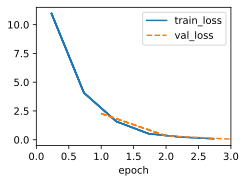

In [20]:

model = LinearRegressionScratch(num_inputs=2, lr=0.03)
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2, batch_size=32)

trainer = Trainer(max_epochs=3)
trainer.fit(model, data)

print('Found w:', model.w.reshape(data.w.shape))
print('Found b:', model.b)
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

### **Pure SGD**
- batch_size = 1 (1 sample/minibatch)
- lr = 0.03
- max_epoch = 3

	Epoch 0/3: (execution time = 0.614142656326294)
	Epoch 1/3: (execution time = 0.5173749923706055)
	Epoch 2/3: (execution time = 0.6382782459259033)
Total training time: 1.7697958946228027
Found w: tensor([ 2.0000, -3.3985], grad_fn=<ViewBackward0>)
Found b: tensor([4.2003], requires_grad=True)
error in estimating w: tensor([ 1.1325e-05, -1.4660e-03])
error in estimating b: tensor([-0.0003])


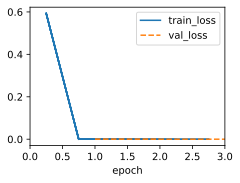

In [21]:
model = LinearRegressionScratch(num_inputs=2, lr=0.03)
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2, batch_size=1)

trainer = Trainer(max_epochs=3)
trainer.fit(model, data)

print('Found w:', model.w.reshape(data.w.shape))
print('Found b:', model.b)
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

### **GD**
- batch_size = 1000 (all samples/minibatch/epoch)
- lr = 0.03
- max_epoch = 3

	Epoch 0/3: (execution time = 0.07266759872436523)
	Epoch 1/3: (execution time = 0.060781240463256836)
	Epoch 2/3: (execution time = 0.058602094650268555)
Total training time: 0.19205093383789062
Found w: tensor([ 0.1854, -0.2953], grad_fn=<ViewBackward0>)
Found b: tensor([0.3777], requires_grad=True)
error in estimating w: tensor([ 1.8146, -3.1047])
error in estimating b: tensor([3.8223])


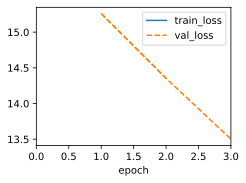

In [22]:
model = LinearRegressionScratch(num_inputs=2, lr=0.03)
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2, batch_size=1000)

trainer = Trainer(max_epochs=3)
trainer.fit(model, data)

print('Found w:', model.w.reshape(data.w.shape))
print('Found b:', model.b)
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

## **Exercise**
- Compare minibatch stochastic gradient descent with a variant that actually samples with replacement from the training set. What happens?


In [23]:
class DataLoaderWithReplacement:
    def __init__(self, dataset, batch_size, num_batches_per_epoch):
        self.dataset = dataset
        self.batch_size = batch_size
        self.num_batches_per_epoch = num_batches_per_epoch
        self.dataset_size = len(dataset)
    
    def __iter__(self):
        for _ in range(self.num_batches_per_epoch):
            # Random a tensor with batch_size elements
            # Each element is the index of the dataset and index can be repeated
            indices = torch.randint(0, self.dataset_size, (self.batch_size,))
            batch = [self.dataset[i] for i in indices]
            yield batch

In [24]:
class SyntheticRegressionDataWithReplacement(SyntheticRegressionData):
    def train_dataloader_with_replacement(self):
        dataset = torch.utils.data.TensorDataset(self.X[:self.num_train], self.y[:self.num_train])
        num_batches_per_epoch = self.num_train // self.batch_size
        return DataLoaderWithReplacement(dataset, self.batch_size, num_batches_per_epoch)


class LinearRegressionScratchWithReplacement(LinearRegressionScratch):
    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader_with_replacement()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

	Epoch 0/8: (execution time = 0.16653752326965332)
	Epoch 1/8: (execution time = 0.16696405410766602)
	Epoch 2/8: (execution time = 0.17609620094299316)
	Epoch 3/8: (execution time = 0.18203425407409668)
	Epoch 4/8: (execution time = 0.18701457977294922)
	Epoch 5/8: (execution time = 0.1926250457763672)
	Epoch 6/8: (execution time = 0.21818017959594727)
	Epoch 7/8: (execution time = 0.21230506896972656)
Total training time: 1.5017569065093994
Found w: tensor([ 1.2905, -2.3098], grad_fn=<ViewBackward0>)
Found b: tensor([2.5907], requires_grad=True)
error in estimating w: tensor([ 0.7095, -1.0902])
error in estimating b: tensor([1.6093])


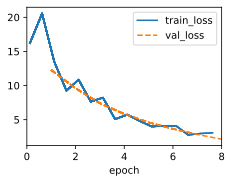

In [25]:
model = LinearRegressionScratch(num_inputs=2, lr=0.03)
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2, batch_size=32, num_train=100, num_val=100)

trainer = Trainer(max_epochs=8)
trainer.fit(model, data)

print('Found w:', model.w.reshape(data.w.shape))
print('Found b:', model.b)
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

	Epoch 0/8: (execution time = 0.1616814136505127)
	Epoch 1/8: (execution time = 0.16275811195373535)
	Epoch 2/8: (execution time = 0.17699408531188965)
	Epoch 3/8: (execution time = 0.21345996856689453)
	Epoch 4/8: (execution time = 0.21332955360412598)
	Epoch 5/8: (execution time = 0.19908404350280762)
	Epoch 6/8: (execution time = 0.2019786834716797)
	Epoch 7/8: (execution time = 0.21066498756408691)
Total training time: 1.5399508476257324
Found w: tensor([ 1.4779, -2.2863], grad_fn=<ViewBackward0>)
Found b: tensor([2.6798], requires_grad=True)
error in estimating w: tensor([ 0.5221, -1.1137])
error in estimating b: tensor([1.5202])


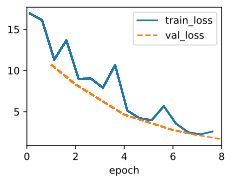

In [26]:
model = LinearRegressionScratchWithReplacement(num_inputs=2, lr=0.03)
data = SyntheticRegressionDataWithReplacement(w=torch.tensor([2, -3.4]), b=4.2, batch_size=32, num_train=100, num_val=100)

trainer = Trainer(max_epochs=8)
trainer.fit(model, data)

print('Found w:', model.w.reshape(data.w.shape))
print('Found b:', model.b)
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

# **4. REFERENCES**

[1] Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2021). "Stochastic Gradient Descent." *Dive into Deep Learning*, https://d2l.ai/chapter_optimization/sgd.html.

[2] Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2021). "Minibatch Stochastic Gradient Descent." *Dive into Deep Learning*, https://d2l.ai/chapter_optimization/minibatch-sgd.html.

[3] Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2021). "Linear Regression." *Dive into Deep Learning*, https://d2l.ai/chapter_linear-regression/linear-regression.html.

[4] Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2021). "Convexity and Jensen's Inequality." *Dive into Deep Learning*, https://d2l.ai/chapter_optimization/convexity.html.

[5] Vũ Hữu Tiệp. "Gradient Descent." *Machine Learning Cơ Bản*, https://machinelearningcoban.com/2017/01/12/gradientdescent/.
 
[6] Vũ Hữu Tiệp. "Gradient Descent (Part 2)." *Machine Learning Cơ Bản*, https://machinelearningcoban.com/2017/01/16/gradientdescent2/.
